# Homework 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Exploratory Data Analysis

In [5]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [7]:
base = ['ram', 'storage', 'screen', 'final_price']

In [17]:
df_base = df[base]

In [18]:
for col in base:
    print(col)
    print(df_base[col].unique()[:5])
    print(df_base[col].nunique())
    print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



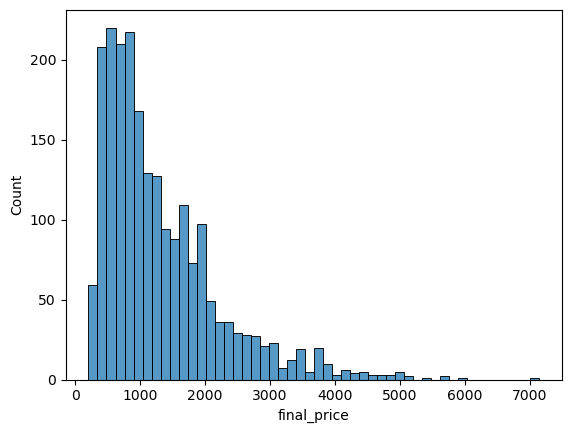

In [19]:
_ = sns.histplot(df_base.final_price, bins = 50)

## Question 1. Missing values

In [20]:
df_base.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [21]:
df_base.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Question 2. Median for RAM

In [22]:
df_base.ram.median()

16.0

## Prepare and split the dataset

In [24]:
n = len(df_base)
n

2160

In [25]:
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val
n, n_val + n_test + n_train

(2160, 2160)

schuffling in order to break any order

In [26]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [27]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [28]:
df_train = df_base.iloc[idx[:n_train]]
df_val = df_base.iloc[idx[n_train: n_train + n_val]]
df_test = df_base.iloc[idx[n_train+n_val:]]
len(df_base), len(df_train) + len(df_val) + len(df_test)

(2160, 2160)

## Question 3. Filling NAs